In [1]:
"""Data Preparation Library"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Models Library"""
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

"""Other"""
import os
import warnings
# from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [2]:
# Importing dataset
df = pd.read_csv("sentiment_and_labels.csv",  encoding='latin-1')

# First 5 rows of data
df.head()

,ID,Sample,negativity,neutrality,positivity,compound,polarity,subjectivity,anger,anticipation,...,surprise,trust,Verdadero,Misinformation,Desinformación,ProGob,ContraGob,NoVerificable,MisDisInformation,Propaganda
0,1,A,0.000,1.000,0.000,0.0000,0.250000,0.333333,0.000000,0.000000,...,0.000000,0.125000,0,0,0,0,0,1,0,0
1,2,A,0.000,0.838,0.162,0.7713,0.000000,0.900000,0.000000,0.000000,...,0.000000,0.037037,1,0,0,0,0,0,0,0
2,3,A,0.000,0.895,0.105,0.6437,0.000000,0.000000,0.000000,0.034483,...,0.034483,0.000000,1,0,0,0,1,0,0,1
3,4,A,0.110,0.890,0.000,-0.6369,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.086957,1,0,0,0,0,0,0,0
4,5,A,0.229,0.677,0.094,-0.4949,0.216667,0.566667,0.066667,0.066667,...,0.066667,0.066667,0,0,0,0,0,1,0,0


In [3]:
# Dataframe size and info

def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
get_df_size(df)
# Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

# Features and data types
# The feature TotalCharges got read by Pandas as object data type. This have impacts during the exploratory analysis and have to be handled. We will convert datatype to float64 in the coming sections.


df.info()

Dataset dimensions 
# Attributes:  26 
# Entries:  938 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 938 non-null    int64  
 1   Sample             938 non-null    object 
 2   negativity         938 non-null    float64
 3   neutrality         938 non-null    float64
 4   positivity         938 non-null    float64
 5   compound           938 non-null    float64
 6   polarity           938 non-null    float64
 7   subjectivity       938 non-null    float64
 8   anger              938 non-null    float64
 9   anticipation       938 non-null    float64
 10  disgust            938 non-null    float64
 11  fear               938 non-null    float64
 12  joy                938 non-null    float64
 13  negative           938 non-null    float64
 14  positive           938 non-null    float64
 15  sadness          

In [4]:
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
ID                   0
Sample               0
negativity           0
neutrality           0
positivity           0
compound             0
polarity             0
subjectivity         0
anger                0
anticipation         0
disgust              0
fear                 0
joy                  0
negative             0
positive             0
sadness              0
surprise             0
trust                0
Verdadero            0
Misinformation       0
Desinformación       0
ProGob               0
ContraGob            0
NoVerificable        0
MisDisInformation    0
Propaganda           0
dtype: int64



In [6]:
df.isna().any()

ID                   False
Sample               False
negativity           False
neutrality           False
positivity           False
compound             False
polarity             False
subjectivity         False
anger                False
anticipation         False
disgust              False
fear                 False
joy                  False
negative             False
positive             False
sadness              False
surprise             False
trust                False
Verdadero            False
Misinformation       False
Desinformación       False
ProGob               False
ContraGob            False
NoVerificable        False
MisDisInformation    False
Propaganda           False
dtype: bool

In [7]:
y1 = df[['Verdadero', 'Misinformation', 'Desinformación', 'ProGob', 'ContraGob', 'NoVerificable', 'MisDisInformation', 'Propaganda']]
X = df[['negativity', 'neutrality', 'positivity', 'compound','polarity', 'subjectivity', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']]

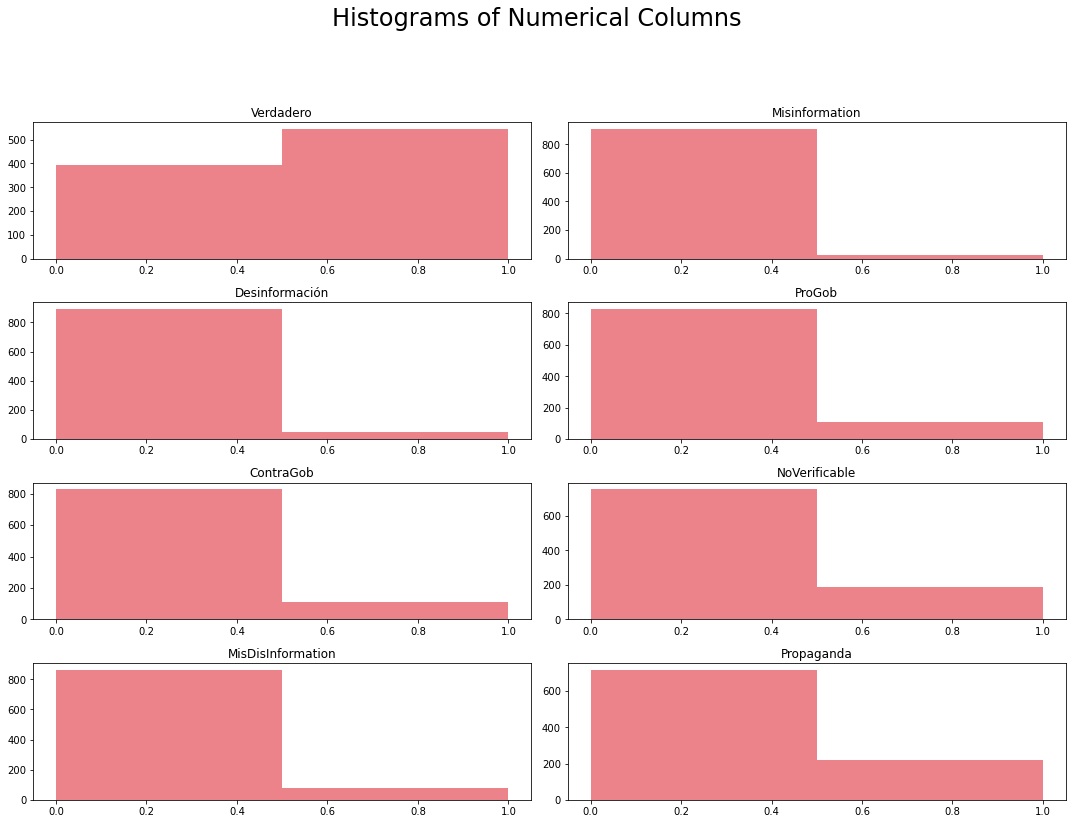

In [8]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(y1.shape[1]):
    plt.subplot(4, 2, i + 1)
    f = plt.gca()
    f.set_title(y1.columns.values[i])

    vals = np.size(y1.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(y1.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
print(y1['Verdadero'].value_counts())
print(y1['Misinformation'].value_counts())
print(y1['Desinformación'].value_counts())
print(y1['ProGob'].value_counts())
print(y1['ContraGob'].value_counts())
print(y1['NoVerificable'].value_counts())
print(y1['MisDisInformation'].value_counts())
print(y1['Propaganda'].value_counts())


1    546
0    392
Name: Verdadero, dtype: int64
0    909
1     29
Name: Misinformation, dtype: int64
0    892
1     46
Name: Desinformación, dtype: int64
0    828
1    110
Name: ProGob, dtype: int64
0    827
1    111
Name: ContraGob, dtype: int64
0    753
1    185
Name: NoVerificable, dtype: int64
0    863
1     75
Name: MisDisInformation, dtype: int64
0    717
1    221
Name: Propaganda, dtype: int64


In [10]:
# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Display countplot based on a set of features

    # Arguments
      cat_list: array, List of features
      df: DataFrame, dataset
      rows: int, number of rows
      columns: int, number of columns
      figsize: figure size, e.g (10, 5)

  """

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette=palette)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

  return fig

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=600)

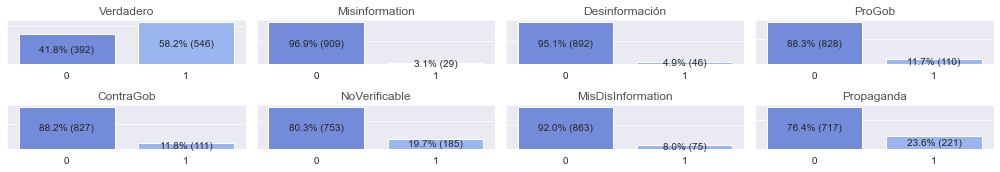

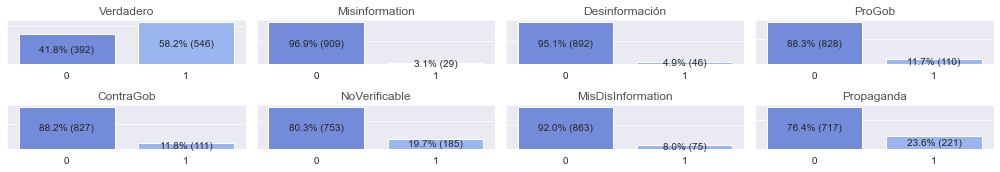

In [11]:

# configure graph style
sns.set_style('darkgrid')
#palette=sns.color_palette("GnBu_d")
#palette=sns.color_palette("BuGn_r")
#palette = sns.light_palette("navy", reverse=True)
palette = sns.color_palette("coolwarm", 7)

ys = ['Verdadero', 'Misinformation', 'Desinformación', 'ProGob', 'ContraGob', 'NoVerificable', 'MisDisInformation', 'Propaganda']

displayCountPlot(ys, y1, rows=2, columns=4, export=False)


In [12]:
y = df[[ 'Propaganda']]

In [13]:
# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Machine Learning Model


In [14]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score gor a given list of models

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Balancing the data

# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_rus, header='After balancing:')

# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)
# Before balancing: 
# Attributes:  40 
# Entries:  5282 

# After balancing: 
# Attributes:  40 
# Entries:  2842 

Before balancing: 
# Attributes:  16 
# Entries:  703 

After balancing: 
# Attributes:  16 
# Entries:  342 



(array([0, 1], dtype=int64), array([171, 171], dtype=int64))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Standardizing the data

# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

In [18]:
# Create baseline using Cross Validation

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instaciate models
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)

print("Here are the scores:---> ", df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.44117647 0.62857143 0.64705882 0.55882353 0.52941176]
recall: 0.561 (+/- 0.07)
#####  SVC  #####
scores: [0.67647059 0.54285714 0.47058824 0.55882353 0.44117647]
recall: 0.538 (+/- 0.08)
#####  LogisticRegression  #####
scores: [0.64705882 0.42857143 0.55882353 0.47058824 0.5       ]
recall: 0.521 (+/- 0.08)
[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aleja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aleja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aleja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aleja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aleja\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aleja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aleja\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassif

[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
#####  XGBClassifier  #####
scores: [0.70588235 0.54285714 0.52941176 0.5        0.52941176]
recall: 0.562 (+/- 0.07)
Here are the scores:--->                            Recall
XGBClassifier           0.561513
DecisionTreeClassifier  0.561008
SVC                     0.537983
LogisticRegression      0.521008


In [40]:
# As LogisticRegression and SVC performed better in terms of Recall metric, I'm going to use those to tune the hyperparameters and check if it can deliver even better results.

# XGB
# I will be tunning solver and C in the Logistic Regression model. As can be seen below it presented a slight improvement after tuned, incresing Recall from 0.80 to 0.82.
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  


model = XGBClassifier()
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
print(classification_report(y_test, preds))

C:\Users\aleja\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       143
           1       0.36      0.20      0.26        45

    accuracy                           0.72       188
   macro avg       0.57      0.54      0.54       188
weighted avg       0.68      0.72      0.69       188



C:\Users\aleja\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


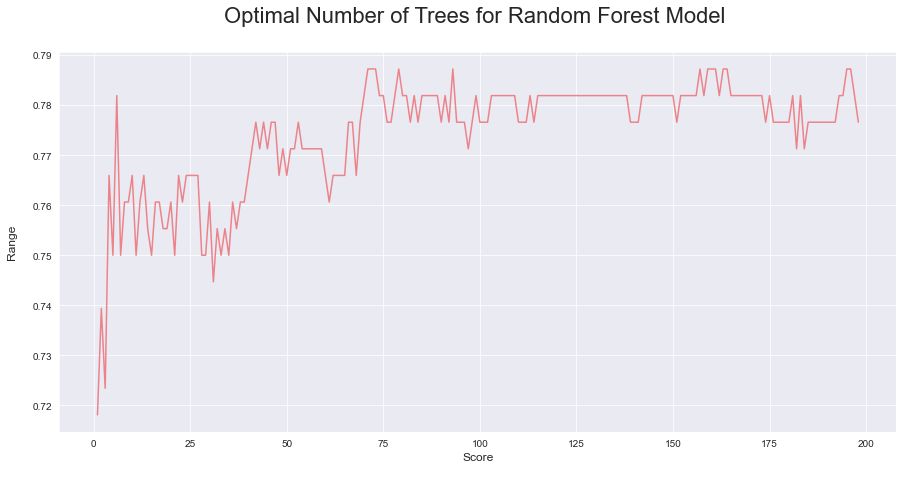

In [36]:
#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,199):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train.values.ravel())
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,199),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()
 
 
#Optimal number of decision trees = 72

In [39]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=99 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train.values.ravel())

# Make predictions
prediction_test = model_rf.predict(X_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       143
           1       0.67      0.09      0.16        45

    accuracy                           0.77       188
   macro avg       0.72      0.54      0.51       188
weighted avg       0.75      0.77      0.70       188



In [37]:
XGB_corr = confusion_matrix(y_test, preds, normalize='true')
rf_corr = confusion_matrix(y_test, prediction_test, normalize='true')

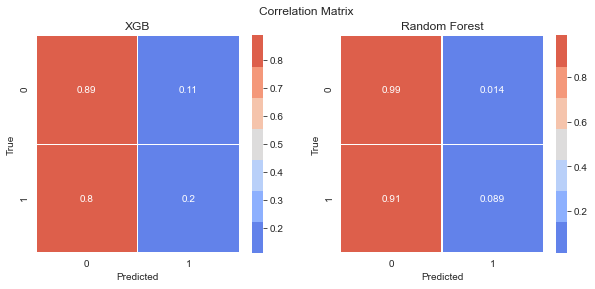

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(XGB_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0])
ax[0].set_title('XGB')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(rf_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1])
ax[1].set_title('Random Forest')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

fig.savefig("correlation_.png", dpi=600)

We conclude that even when the best model for accuracy is Random Forest, we see that XGB can predict with better accuracy Propaganda, but risking labeling some into propaganda when they are not.

1. Is data balanced in terms of the labeled categories? (2 points)

   1.1. Plot the distribution of tweets in every category

   1.2. Is there overlap between the categories?
    R= There is Overlap between the categories because some categories had more than one positive label checked
    

2. Train two data models to classify the tweets in the given category using sentiment data. (10 points)

   2.1. Choose as target variable one of {Misinformation, Desinformación, ProGob, ContraGob, MisDisInformation, Propaganda}, or define a multiclass label from a combination of these features with {Verdadero, NoVerificable}. 

   2.2. Select the features that most contribute to the classification (if necessary)

   2.3. Select the algorithm or algorithms to use.

   2.4. Apply a technique for dealing with data imbalance.

   2.5. Train the models

   2.6. Refine the parameters of the model.

3. Evaluate the models and select the best one. (4 points)

   3.1. Calculate the accuracy, precision and recall

   3.2. Calculate the confussion matrix

   3.3. Indicate which was the metric used for seleting the best model. 
    
    We used Recall to select the best two models
    And even when the accuaricy seemed to be best in Random Forest, XGB was chosen based that in the confussion matrix more true possitives were detected

4. Considering the precision and recall of both models, as well as the distribution of tweets in the categories, discuss how likely would be to use the selected model for classifying 1 million tweets? (4 points)

    This model may not be viable for a million tweet due to the simple reason that all the predictors have to be rated by profesionals, but taking away the resource expenses, the this model could be used for classifing a million tweets, because even when you might miss some propaganda, ths might help to find some, but the model should not be used in a official scenario becaus the high level of false positives might cause other problems

In [2]:
conda install nbconvert

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
